In [16]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [3]:
data=pd.read_csv('/content/Crop_recommendation.csv')

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
len(data)

2200

In [10]:
(data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
data['label'].unique(),len(data['label'].unique())

(array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
        'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
        'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
        'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
       dtype=object),
 22)

In [13]:
data['label'].value_counts()


,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [15]:
X = data.drop('label', axis=1)
y = data['label']

In [19]:
type(y)

pandas.core.series.Series

In [20]:
y = data[['label']]  # This makes it a DataFrame, not Series
type(y)

pandas.core.frame.DataFrame

In [21]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y_encoded = ohe.fit_transform(y)


In [22]:
class_names = ohe.categories_[0]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler for test data
X_test_scaled = scaler.transform(X_test)


In [29]:
len(X_train),len(X_test)

(1760, 440)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(
    monitor='val_loss',     # you can also use 'val_accuracy'
    patience=5,             # stops after 5 epochs with no improvement
    restore_best_weights=True
)


In [28]:
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.0829 - loss: 3.0482 - val_accuracy: 0.4744 - val_loss: 2.5011
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3836 - loss: 2.3543 - val_accuracy: 0.6790 - val_loss: 1.6490
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5815 - loss: 1.5827 - val_accuracy: 0.8125 - val_loss: 1.0128
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6770 - loss: 1.0923 - val_accuracy: 0.8494 - val_loss: 0.6815
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7340 - loss: 0.8395 - val_accuracy: 0.8835 - val_loss: 0.5385
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7599 - loss: 0.7300 - val_accuracy: 0.9006 - val_loss: 0.4364
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7993 - loss: 0.6179 - val_accuracy: 0.9091 - val_loss: 0.3739
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7899 - loss: 0.5511 - val_accuracy: 0.9006 - val_loss

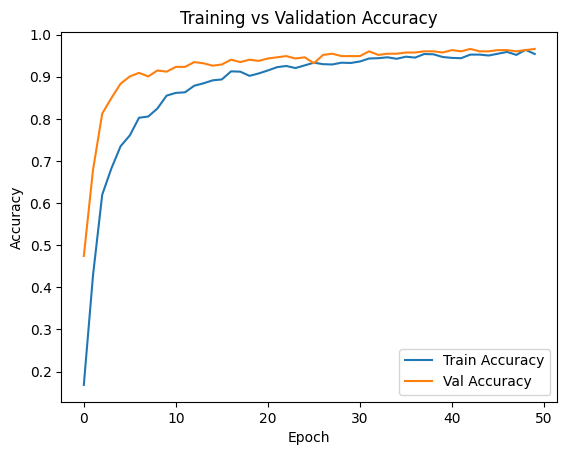

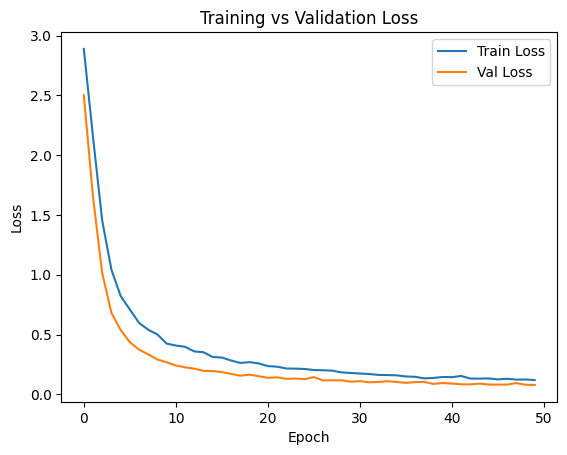

In [30]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [31]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9622 - loss: 0.1082
Test Accuracy: 95.68%


#prediction

In [32]:
def predict_crop(input_features, model, scaler, ohe):
    """
    Predict crop based on input features.

    Parameters:
    - input_features: array-like or list of shape (n_features,) or (n_samples, n_features)
    - model: trained Keras model
    - scaler: fitted StandardScaler
    - ohe: fitted OneHotEncoder

    Returns:
    - list of predicted crop labels
    """
    import numpy as np

    # Ensure 2D input
    input_array = np.array(input_features)
    if input_array.ndim == 1:
        input_array = input_array.reshape(1, -1)

    # Scale the input
    input_scaled = scaler.transform(input_array)

    # Predict probabilities
    pred_probs = model.predict(input_scaled)

    # Get index of max prob
    pred_indices = pred_probs.argmax(axis=1)

    # Map back to label names
    predicted_labels = [ohe.categories_[0][i] for i in pred_indices]

    return predicted_labels


In [33]:
sample = [90, 42, 43, 20.8, 82.0, 6.5, 200]  # [N, P, K, temp, humidity, pH, rainfall]
print(predict_crop(sample, model, scaler, ohe))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
['rice']


In [34]:
model.save('crop_recommendation_model.h5')  # HDF5 format
